<a href="https://colab.research.google.com/github/bsumanthreddy/DataScientist/blob/main/Attempt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=72d859bdff818f39a1975ec0a131ae409603388287307b9b05323168cb03b44d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df=pd.read_csv('/content/predictive_maintenance_dataset.csv')

In [ ]:
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [ ]:
# Drop one or more columns by specifying their names
columns_to_drop = ['metric7','metric6']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,0,3
...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,0,0


In [ ]:
# Get unique values of the 'Device' column
unique_devices = df['device'].unique()

# 'unique_devices' now contains the unique values from the 'Device' column
print(unique_devices)

['S1F01085' 'S1F0166B' 'S1F01E6Y' ... 'S1F02XLX' 'S1F03499' 'W1F1DA5ÿ']


In [ ]:
df['metric1_max'] = df.groupby('device')['metric1'].transform('max')

In [ ]:
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric8,metric9,metric1_max
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,0,7,215630672
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,0,0,224339296
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,0,0,240257968
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,0,0,235562856
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,0,3,243500200
...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,8,0,240525704
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,0,13,244070728
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,0,0,243522872
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,0,0,243554608


In [ ]:


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Calculate the number of days since the start date
df['No. of days'] = (df['date'] - df.groupby('device')['date'].transform('min')).dt.days

# Find the row with the maximum number of days for each device
max_days_df = df.loc[df.groupby('device')['No. of days'].idxmax()]

print(max_days_df)



             date    device  failure    metric1  metric2  metric3  metric4  \
5812   2015-01-06  S1F01085        0  128832128       56        0       52   
80194  2015-05-11  S1F013BB        0  115676688        0        0        0   
5813   2015-01-06  S1F0166B        0    7441792        0        3        0   
36421  2015-02-17  S1F01E6Y        0  147350000        0        0        0   
5815   2015-01-06  S1F01JE0        0  185424928        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124003 2015-10-19  Z1F1VMZB        0   96949360        0        0        0   
98175  2015-06-30  Z1F1VQFY        1  178051496        0        0        0   
61308  2015-03-25  Z1F26YZB        0  229065488        0        1        0   
61309  2015-03-25  Z1F282ZV        0   72717600        0        1        0   
67274  2015-04-06  Z1F2PBHX        0  130522432        0        0        0   

        metric5  metric8  metric9  metric1_max  No. of days  
5

In [ ]:
max_days_df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric8,metric9,metric1_max,No. of days
5812,2015-01-06,S1F01085,0,128832128,56,0,52,6,0,7,215630672,5
80194,2015-05-11,S1F013BB,0,115676688,0,0,0,5,0,0,243346080,5
5813,2015-01-06,S1F0166B,0,7441792,0,3,0,6,0,0,224339296,5
36421,2015-02-17,S1F01E6Y,0,147350000,0,0,0,12,0,0,240257968,47
5815,2015-01-06,S1F01JE0,0,185424928,0,0,0,6,0,0,235562856,5
...,...,...,...,...,...,...,...,...,...,...,...,...
124003,2015-10-19,Z1F1VMZB,0,96949360,0,0,0,5,0,0,242361392,291
98175,2015-06-30,Z1F1VQFY,1,178051496,0,0,0,7,0,0,243071840,180
61308,2015-03-25,Z1F26YZB,0,229065488,0,1,0,1,0,0,241938368,83
61309,2015-03-25,Z1F282ZV,0,72717600,0,1,0,1,0,0,243169296,83


In [ ]:
max_days_df.to_csv('Updated_cox.csv')

In [ ]:
columns_to_drop = ['date','metric1']
max_days_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df2=max_days_df

In [ ]:
df2.to_csv('Updated_df2.csv')

In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
df2.loc[df['device']=='S1F0RRB1']

,device,failure,metric2,metric3,metric4,metric5,metric8,metric9,metric1_max,No. of days
235,S1F0RR35,1,200,0,0,16,0,0,243881312,127


In [ ]:
df3=df2

In [ ]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
failure,1169.0,8.639863e-02,2.810720e-01,0.0,0.0,0.0,0.0,1.0
metric2,1169.0,8.722601e+02,5.990879e+03,0.0,0.0,0.0,0.0,64792.0
metric3,1169.0,3.124380e+01,7.382520e+02,0.0,0.0,0.0,0.0,24929.0
metric4,1169.0,9.808383e+00,7.894605e+01,0.0,0.0,0.0,0.0,1666.0
metric5,1169.0,1.244482e+01,1.236616e+01,1.0,7.0,9.0,12.0,98.0
metric8,1169.0,4.443114e+00,4.372586e+01,0.0,0.0,0.0,0.0,832.0
metric9,1169.0,1.091112e+02,2.155356e+03,0.0,0.0,0.0,1.0,70000.0
metric1_max,1169.0,2.285739e+08,2.925746e+07,48467332.0,230095320.0,241777448.0,243444592.0,244140480.0
No. of days,1169.0,1.114722e+02,1.039973e+02,0.0,5.0,85.0,225.0,305.0


In [ ]:
columns_to_drop = ['device']
df3.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df3

,failure,metric2,metric3,metric4,metric5,metric8,metric9,metric1_max,No. of days
0,0,56,0,52,6,0,7,215630672,5
1,0,0,0,0,5,0,0,243346080,5
2,0,0,3,0,6,0,0,224339296,5
3,0,0,0,0,12,0,0,240257968,47
4,0,0,0,0,6,0,0,235562856,5
...,...,...,...,...,...,...,...,...,...
1164,0,0,0,0,5,0,0,242361392,291
1165,1,0,0,0,7,0,0,243071840,180
1166,0,0,1,0,1,0,0,241938368,83
1167,0,0,1,0,1,0,0,243169296,83


In [ ]:
df3['No. of days'].isna().sum()

0

In [ ]:
df3

,failure,metric2,metric3,metric4,metric5,metric8,metric9,metric1_max,No. of days
0,0,56,0,52,6,0,7,215630672,5
1,0,0,0,0,5,0,0,243346080,5
2,0,0,3,0,6,0,0,224339296,5
3,0,0,0,0,12,0,0,240257968,47
4,0,0,0,0,6,0,0,235562856,5
...,...,...,...,...,...,...,...,...,...
1164,0,0,0,0,5,0,0,242361392,291
1165,1,0,0,0,7,0,0,243071840,180
1166,0,0,1,0,1,0,0,241938368,83
1167,0,0,1,0,1,0,0,243169296,83


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   failure      1169 non-null   int64
 1   metric2      1169 non-null   int64
 2   metric3      1169 non-null   int64
 3   metric4      1169 non-null   int64
 4   metric5      1169 non-null   int64
 5   metric8      1169 non-null   int64
 6   metric9      1169 non-null   int64
 7   metric1_max  1169 non-null   int64
 8   No. of days  1169 non-null   int64
dtypes: int64(9)
memory usage: 82.3 KB


In [ ]:
df3=df3.dropna()

In [ ]:
cph = CoxPHFitter()

In [ ]:
cph.fit(df3, duration_col='No. of days', event_col='failure')

/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 1169 total observations, 1068 right-censored observations>

<Axes: xlabel='log(HR) (95% CI)'>

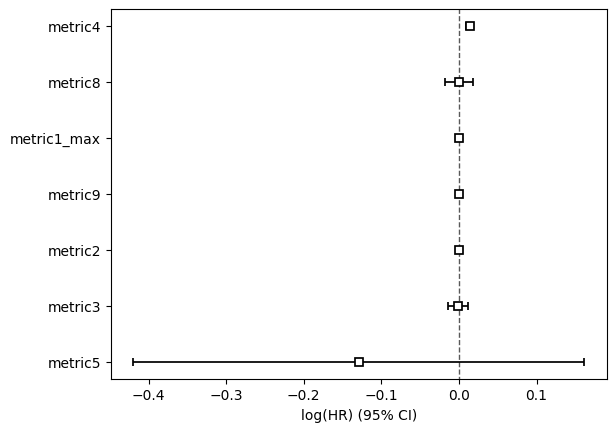

In [ ]:
cph.plot()

In [ ]:
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"], decimals=3)

<lifelines.CoxPHFitter: fitted with 1169 total observations, 1068 right-censored observations>
             duration col = 'No. of days'
                event col = 'failure'
      baseline estimation = breslow
   number of observations = 1169
number of events observed = 101
   partial log-likelihood = -1802.632
         time fit was run = 2023-10-08 17:39:59 UTC

---
              coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                             
metric2     -0.000      1.000                0.999                1.001 -0.196   0.845
metric3     -0.001      0.999                0.986                1.012 -0.182   0.856
metric4      0.014      1.014                1.009                1.018  6.131 <0.0005
metric5     -0.129      0.879                0.657                1.175 -0.871   0.384
metric8      0.000      1.000                0.983                1.018  0.018   0.986
metric9     -0.000      1.000                0.999                1.001 -0.105   0.917
metric1_max  0.000      1.000                1.000                1.000  0.241   0.809
---
Concordance = 0.376
Partial AIC = 3619.263
log-likelihood ratio test = -2350.549 on 7 df
-log2(p) of ll-ratio test = -0.000

In [ ]:
cph.predict_survival_function(df3)

,0,1,2,3,4,5,6,7,8,9,...,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286.0,0.995947,0.955111,0.994870,0.986776,0.982763,0.992377,0.965759,0.976527,0.991976,0.988023,...,0.998899,0.963338,0.967671,0.952751,0.999338,0.959555,0.966152,0.936093,0.927327,0.952225
291.0,0.995947,0.955111,0.994870,0.986776,0.982763,0.992377,0.965759,0.976527,0.991976,0.988023,...,0.998899,0.963338,0.967671,0.952751,0.999338,0.959555,0.966152,0.936093,0.927327,0.952225
294.0,0.995947,0.955111,0.994870,0.986776,0.982763,0.992377,0.965759,0.976527,0.991976,0.988023,...,0.998899,0.963338,0.967671,0.952751,0.999338,0.959555,0.966152,0.936093,0.927327,0.952225
298.0,0.989719,0.889703,0.986997,0.966693,0.956721,0.980716,0.915159,0.941349,0.979708,0.969805,...,0.997200,0.909334,0.919777,0.884120,0.998317,0.900274,0.916109,0.845314,0.825317,0.882878


<Axes: xlabel='No of days', ylabel='Survival Probability'>

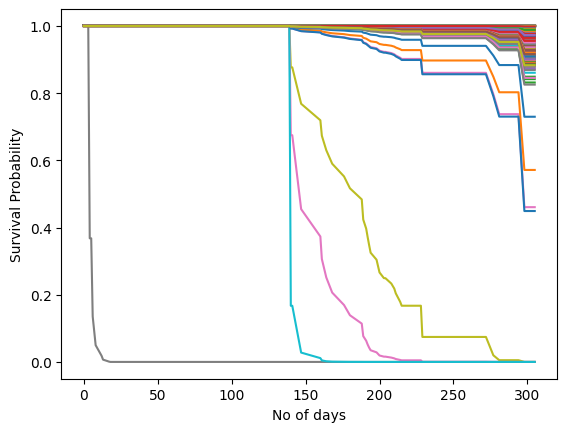

In [ ]:
cph.predict_survival_function(df3).plot(xlabel='No of days', ylabel='Survival Probability',legend=False)

In [ ]:
df3.loc[757]

failure                1
metric2            10200
metric3                1
metric4             1666
metric5               14
metric8                0
metric9                7
metric1_max    239147104
No. of days          139
Name: 757, dtype: int64

<Axes: xlabel='No of days', ylabel='Survival Probability'>

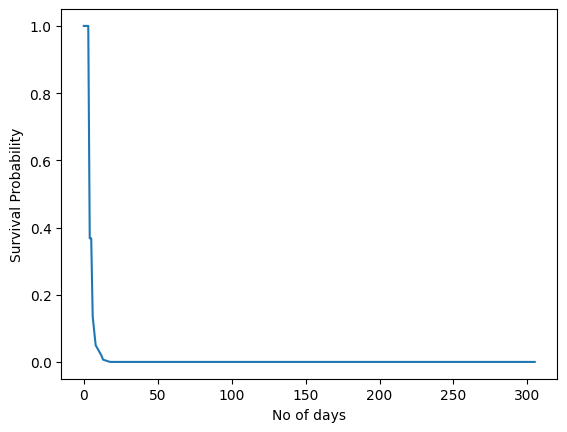

In [ ]:
cph.predict_survival_function(df3.loc[757]).plot(xlabel='No of days', ylabel='Survival Probability',legend=False)

In [ ]:
cph.predict_survival_function(df.loc[42])

,42
0.0,1.00000
2.0,1.00000
3.0,1.00000
4.0,1.00000
5.0,1.00000
...,...
286.0,0.94767
291.0,0.94767
294.0,0.94767
298.0,0.87217


In [ ]:
cph.predict_survival_function(df.loc[235])

,235
0.0,1.0
2.0,1.0
3.0,1.0
4.0,1.0
5.0,1.0
...,...
286.0,1.0
291.0,1.0
294.0,1.0
298.0,1.0


In [ ]:
import joblib

# Assuming you have already fitted your CoxPHSurvivalAnalysis estimator and named it 'estimator'
model_filename = 'cox_model3.pkl'

# Serialize and save the trained model
joblib.dump(cph, model_filename)

['cox_model3.pkl']

In [ ]:
import joblib

# Load the serialized model
loaded_coxfitter = joblib.load(model_filename)

# Now you can use 'loaded_estimator' for predictions or analysis

In [ ]:
data = {
    'No. of days': 139,

    'metric1_max': 239147104,
    'metric2': 10200,
    'metric3': 1,
    'metric4': 1666,
    'metric5': 14,

    'metric8': 0,
    'metric9': 7,
    'failure': 0
}

input_data = pd.DataFrame([data])

In [ ]:
input_data

,No. of days,metric1_max,metric2,metric3,metric4,metric5,metric8,metric9,failure
0,139,239147104,10200,1,1666,14,0,7,0


In [ ]:
#cph.predict_survival_function(input_data.loc[0])